In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import roc_auc_score, confusion_matrix, precision_recall_fscore_support,roc_curve, classification_report
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/ML Project/diabetes_binary_health_indicators_BRFSS2015.csv")

In [ ]:
df.shape

(253680, 22)

In [ ]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


Check missing values

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
dup = df[df.duplicated()]
print(f"Number of duplicate rows : {len(dup)}")

Number of duplicate rows : 24206


In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.shape

(229474, 22)

Show the distribution of each features

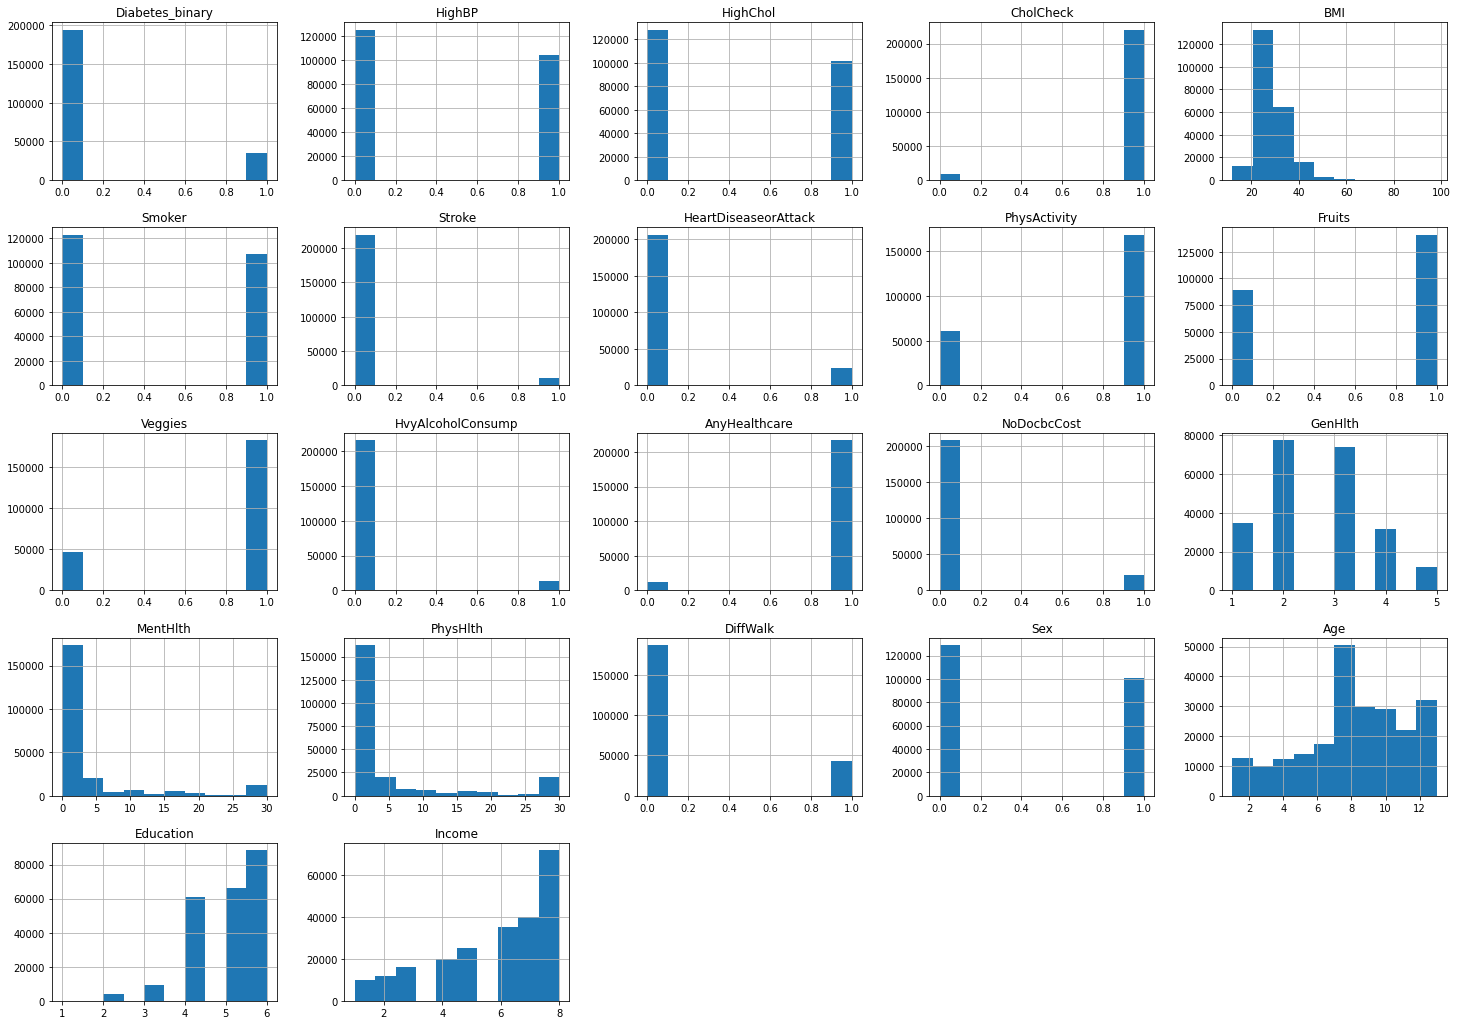

In [ ]:
df.hist(figsize=(25,18));

Check the correlation between features

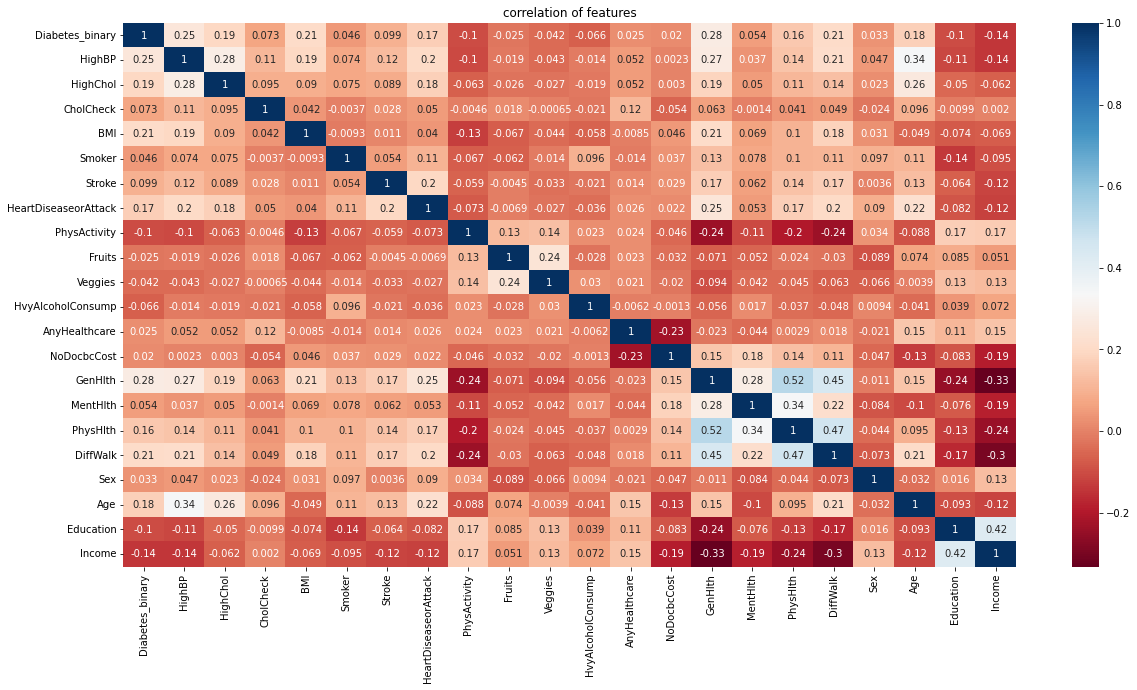

In [ ]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title("correlation of features")
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


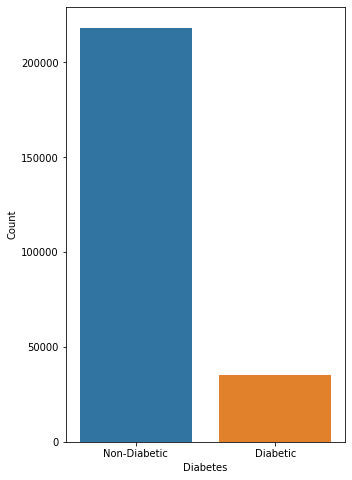

In [4]:
X=df.drop('Diabetes_binary', axis=1)
y=df['Diabetes_binary']
plt.figure(figsize=(5,8))
sns.countplot(df["Diabetes_binary"].replace({0:"Non-Diabetic",1:"Diabetic"}))
plt.xlabel("Diabetes")
plt.ylabel("Count")
plt.show()

In [10]:
df.groupby("Diabetes_binary").size()

Diabetes_binary
0.0    218334
1.0     35346
dtype: int64

In [11]:
print(35346/(35346+218334))

0.13933301797540207


In [ ]:
# df.groupby(['HighBP', 'Diabetes_binary']).size().unstack().plot(kind='bar', stacked=True, ylabel='count') #plot for each feature

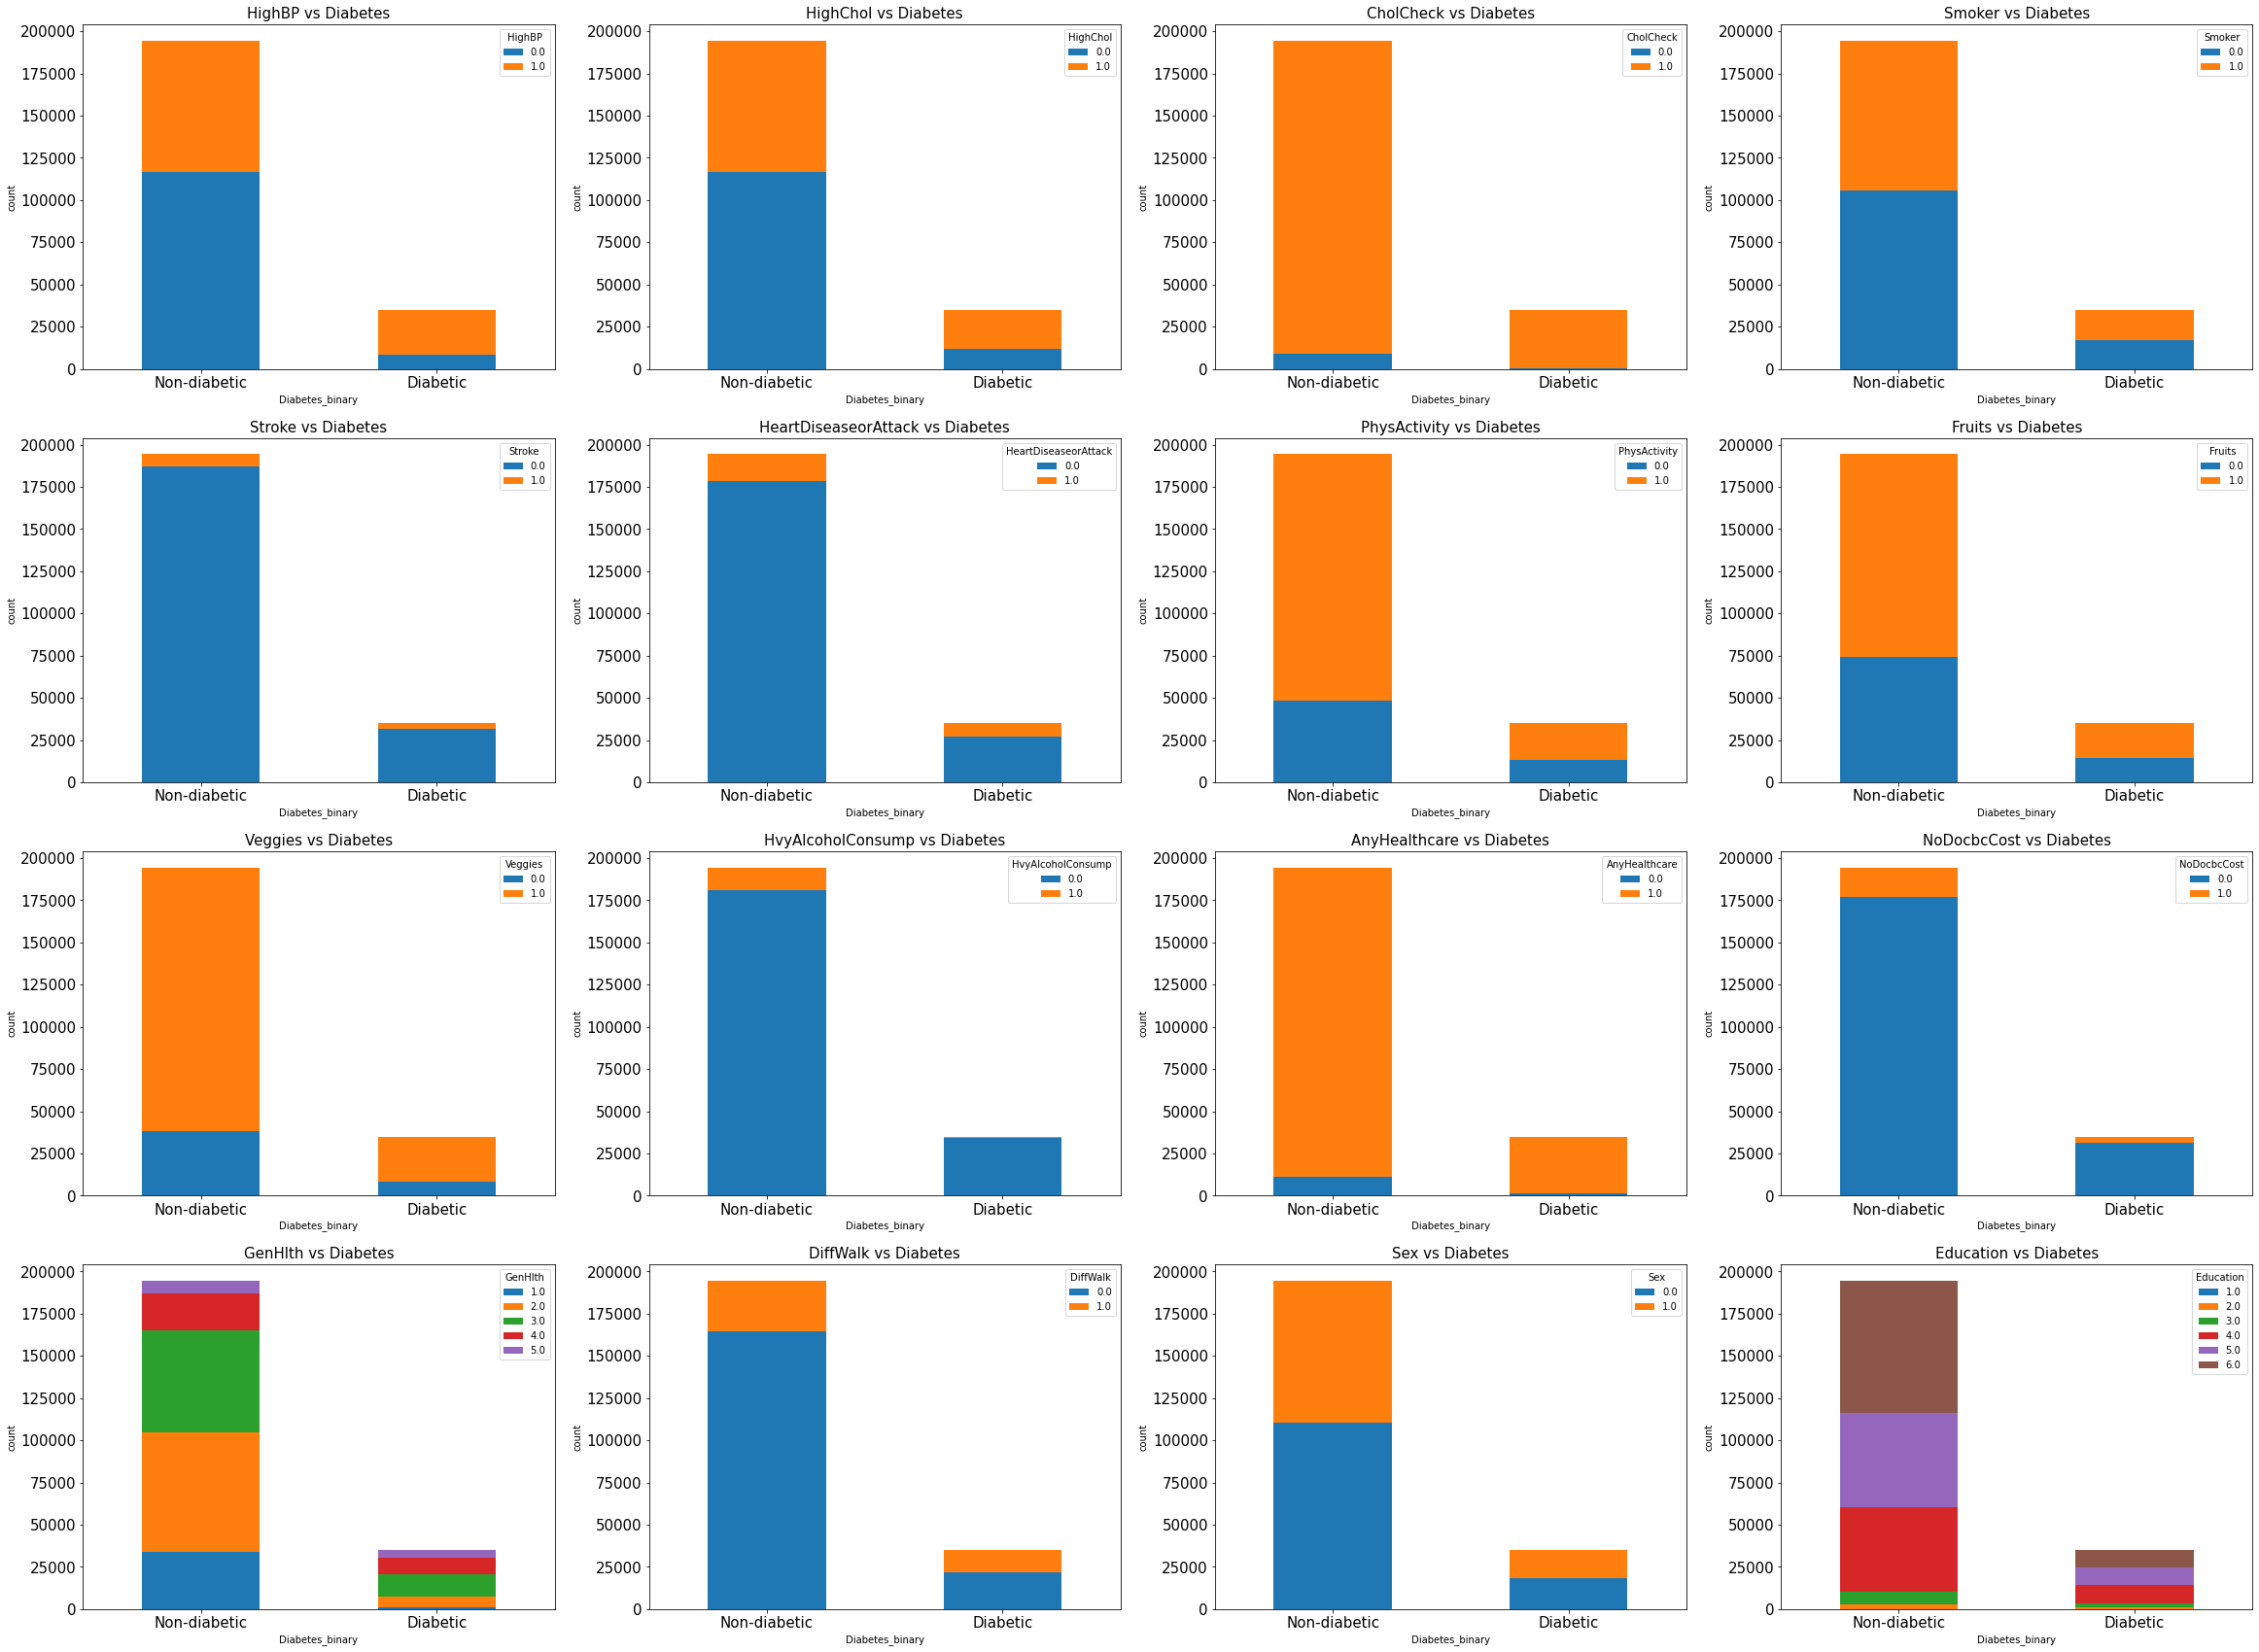

In [ ]:
#code for 4x4 plot on slides
# MentHlth
# PhysHlth
# Age
# Income
# BMI
# Diabetes_binary
columns= df.drop(['MentHlth', 'PhysHlth', 'Age', 'Income', 'BMI', 'Diabetes_binary'], axis=1).columns
fig, axes = plt.subplots(4, 4, figsize=(40,30))
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15

i = 0
for r in range(4):
    for c in range(4):
        df.groupby(['Diabetes_binary', columns[i]]).size().unstack().rename(index={0.0: 'Non-diabetic', 1.0: 'Diabetic'}).plot(kind='bar', rot = 0, fontsize=15, stacked=True, title=f'{columns[i]} vs Diabetes', ylabel='count', ax=axes[r,c])
        i+=1


In [ ]:
X_dev, X_test, y_dev, y_test = train_test_split(X,y,test_size = 0.2, random_state=42, stratify=y)

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from sklearn.metrics import recall_score,precision_score,f1_score

In [ ]:
smo = SMOTE(random_state = 42)
X_dev_smo,y_dev_smo = smo.fit_resample(X_dev,y_dev)

In [ ]:
ss = StandardScaler()
X_dev = ss.fit_transform(X_dev)
X_dev_smo = ss.fit_transform(X_dev_smo)
X_test = ss.transform(X_test)

In [ ]:
y_dev=y_dev.values.reshape(y_dev.shape[0],1)
y_dev_smo=y_dev_smo.values.reshape(y_dev_smo.shape[0],1)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev,test_size=0.2)
X_train_smo, X_val_smo, y_train_smo, y_val_smo = train_test_split(X_dev_smo, y_dev_smo,test_size=0.2)

In [ ]:
y_train = to_categorical(y_train,2)
y_val = to_categorical(y_val,2)
y_train_smo = to_categorical(y_train_smo,2)
y_val_smo = to_categorical(y_val_smo,2)
# y_test = to_categorical(y_test,2)

In [ ]:
from keras import backend as K

def recall_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
  recall = true_positives / (possible_positives + K.epsilon())
  return recall

def precision_m(y_true, y_pred):
  true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
  predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
  precision = true_positives / (predicted_positives + K.epsilon())
  return precision

def f1_m(y_true, y_pred):
  precision = precision_m(y_true, y_pred)
  recall = recall_m(y_true, y_pred)
  return 2*((precision*recall)/(precision+recall+K.epsilon()))

Without Smote

In [ ]:
model = Sequential()
model.add(Input(shape=(21,)))
model.add(BatchNormalization())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(64,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(32,activation="relu"))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(2,activation="softmax"))

In [ ]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy",precision_m, recall_m,f1_m])
history_callback = model.fit(X_train,y_train,batch_size=128,epochs=20,verbose=1,validation_data=(X_val,y_val))

Epoch 1/20
1148/1148 [==============================] - 6s 4ms/step - loss: 0.3674 - accuracy: 0.8460 - precision_m: 0.8460 - recall_m: 0.8460 - f1_m: 0.8460 - val_loss: 0.3408 - val_accuracy: 0.8498 - val_precision_m: 0.8499 - val_recall_m: 0.8499 - val_f1_m: 0.8499
Epoch 2/20
1148/1148 [==============================] - 4s 3ms/step - loss: 0.3507 - accuracy: 0.8485 - precision_m: 0.8485 - recall_m: 0.8485 - f1_m: 0.8485 - val_loss: 0.3384 - val_accuracy: 0.8517 - val_precision_m: 0.8517 - val_recall_m: 0.8517 - val_f1_m: 0.8517
Epoch 3/20
1148/1148 [==============================] - 4s 3ms/step - loss: 0.3490 - accuracy: 0.8488 - precision_m: 0.8488 - recall_m: 0.8488 - f1_m: 0.8488 - val_loss: 0.3373 - val_accuracy: 0.8526 - val_precision_m: 0.8526 - val_recall_m: 0.8526 - val_f1_m: 0.8526
Epoch 4/20
1148/1148 [==============================] - 4s 3ms/step - loss: 0.3473 - accuracy: 0.8492 - precision_m: 0.8492 - recall_m: 0.8492 - f1_m: 0.8492 - val_loss: 0.3377 - val_accuracy: 0.8

In [ ]:
hist=pd.DataFrame(history_callback.history)

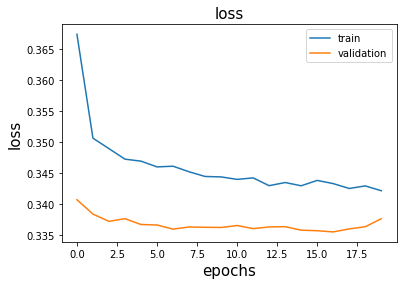

In [ ]:
plt.plot(hist.index,hist["loss"])
plt.plot(hist.index,hist["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

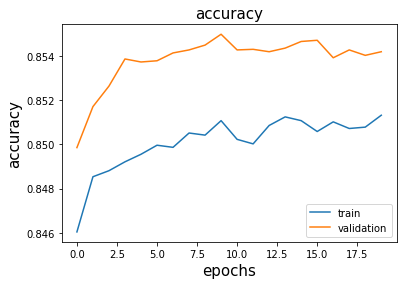

In [ ]:
plt.plot(hist.index,hist["accuracy"])
plt.plot(hist.index,hist["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

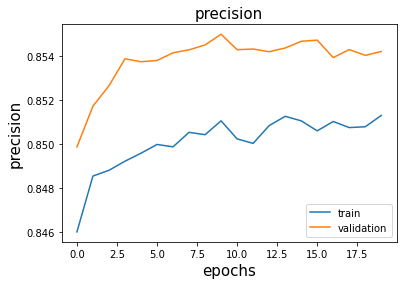

In [ ]:
plt.plot(hist.index,hist["precision_m"])
plt.plot(hist.index,hist["val_precision_m"])
plt.xlabel("epochs")
plt.ylabel("precision")
plt.title("precision")
plt.legend(["train","validation"])
plt.show()

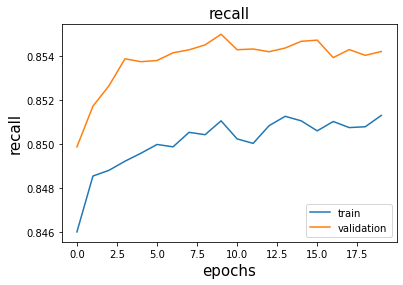

In [ ]:
plt.plot(hist.index,hist["recall_m"])
plt.plot(hist.index,hist["val_recall_m"])
plt.xlabel("epochs")
plt.ylabel("recall")
plt.title("recall")
plt.legend(["train","validation"])
plt.show()

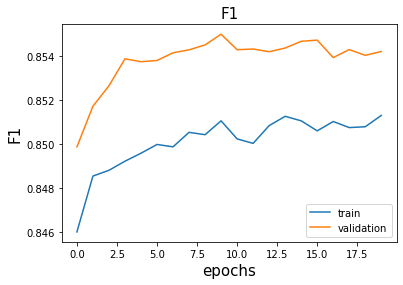

In [ ]:
plt.plot(hist.index,hist["f1_m"])
plt.plot(hist.index,hist["val_f1_m"])
plt.xlabel("epochs")
plt.ylabel("F1")
plt.title("F1")
plt.legend(["train","validation"])
plt.show()

In [ ]:
y_pred = model.predict(X_test)

1435/1435 [==============================] - 2s 1ms/step


In [ ]:
print(classification_report(y_test.values,np.argmax(y_pred, axis=1) ))

              precision    recall  f1-score   support

         0.0       0.85      0.99      0.92     38876
         1.0       0.69      0.06      0.12      7019

    accuracy                           0.85     45895
   macro avg       0.77      0.53      0.52     45895
weighted avg       0.83      0.85      0.80     45895



With SMOTE

In [ ]:
model_smo = Sequential()
model_smo.add(Input(shape=(21,)))
model_smo.add(BatchNormalization())
model_smo.add(Dense(64,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(48,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(32,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(24,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(16,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(8,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(BatchNormalization())
model_smo.add(Dense(4,activation="relu"))
model_smo.add(Dropout(0.2))
model_smo.add(Dense(2,activation="softmax"))

In [ ]:
model_smo.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy",precision_m, recall_m,f1_m])
history_callback_smo = model_smo.fit(X_train_smo,y_train_smo,batch_size=128,epochs=20,verbose=1,validation_data=(X_val_smo,y_val_smo))

Epoch 1/20
1944/1944 [==============================] - 9s 4ms/step - loss: 0.5651 - accuracy: 0.7097 - precision_m: 0.7097 - recall_m: 0.7097 - f1_m: 0.7097 - val_loss: 0.4760 - val_accuracy: 0.7726 - val_precision_m: 0.7726 - val_recall_m: 0.7726 - val_f1_m: 0.7726
Epoch 2/20
1944/1944 [==============================] - 7s 3ms/step - loss: 0.5117 - accuracy: 0.7545 - precision_m: 0.7545 - recall_m: 0.7545 - f1_m: 0.7545 - val_loss: 0.4343 - val_accuracy: 0.7990 - val_precision_m: 0.7990 - val_recall_m: 0.7990 - val_f1_m: 0.7990
Epoch 3/20
1944/1944 [==============================] - 7s 3ms/step - loss: 0.4827 - accuracy: 0.7674 - precision_m: 0.7674 - recall_m: 0.7674 - f1_m: 0.7674 - val_loss: 0.3990 - val_accuracy: 0.8111 - val_precision_m: 0.8111 - val_recall_m: 0.8111 - val_f1_m: 0.8111
Epoch 4/20
1944/1944 [==============================] - 7s 4ms/step - loss: 0.4640 - accuracy: 0.7775 - precision_m: 0.7775 - recall_m: 0.7775 - f1_m: 0.7775 - val_loss: 0.4017 - val_accuracy: 0.8

In [ ]:
hist_smo=pd.DataFrame(history_callback_smo.history)

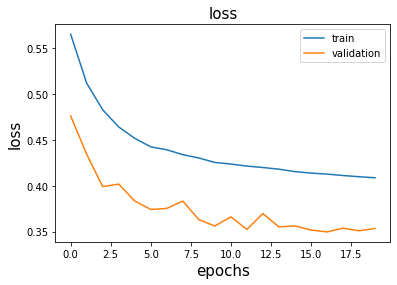

In [ ]:
plt.plot(hist_smo.index,hist_smo["loss"])
plt.plot(hist_smo.index,hist_smo["val_loss"])
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("loss")
plt.legend(["train","validation"])
plt.show()

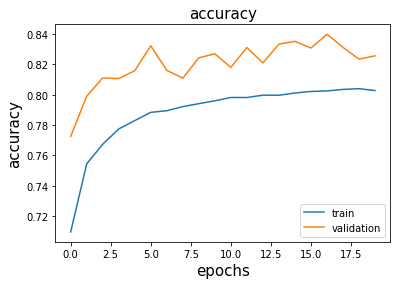

In [ ]:
plt.plot(hist_smo.index,hist_smo["accuracy"])
plt.plot(hist_smo.index,hist_smo["val_accuracy"])
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("accuracy")
plt.legend(["train","validation"])
plt.show()

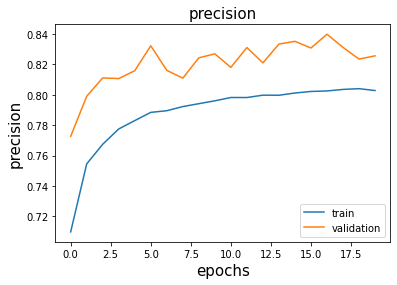

In [ ]:
plt.plot(hist_smo.index,hist_smo["precision_m"])
plt.plot(hist_smo.index,hist_smo["val_precision_m"])
plt.xlabel("epochs")
plt.ylabel("precision")
plt.title("precision")
plt.legend(["train","validation"])
plt.show()

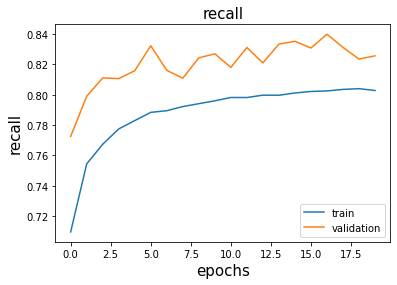

In [ ]:
plt.plot(hist_smo.index,hist_smo["recall_m"])
plt.plot(hist_smo.index,hist_smo["val_recall_m"])
plt.xlabel("epochs")
plt.ylabel("recall")
plt.title("recall")
plt.legend(["train","validation"])
plt.show()

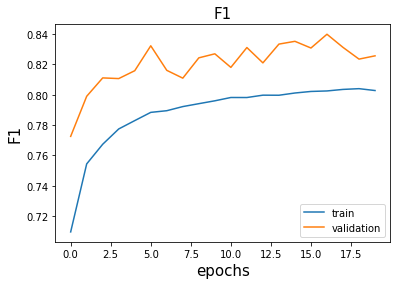

In [ ]:
plt.plot(hist_smo.index,hist_smo["f1_m"])
plt.plot(hist_smo.index,hist_smo["val_f1_m"])
plt.xlabel("epochs")
plt.ylabel("F1")
plt.title("F1")
plt.legend(["train","validation"])
plt.show()

In [ ]:
y_pred_smo = model_smo.predict(X_test)

1435/1435 [==============================] - 2s 1ms/step


In [ ]:
print(classification_report(y_test.values,np.argmax(y_pred_smo, axis=1) ))

              precision    recall  f1-score   support

         0.0       0.93      0.75      0.83     38876
         1.0       0.33      0.70      0.45      7019

    accuracy                           0.74     45895
   macro avg       0.63      0.72      0.64     45895
weighted avg       0.84      0.74      0.77     45895

